In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Input,Dropout,GlobalAveragePooling2D
from keras import applications
import time
from tensorflow import keras

In [ ]:
BATCH_SIZE = 32
img_height = 150
TARGET_SIZE=(150,150)

img_width = 150
val_split = 0.1
data_dir = "/content/drive/MyDrive/natural_images"

In [ ]:
datagen = ImageDataGenerator(rescale= 1.0/255,
          validation_split = val_split)
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    color_mode ='rgb',
    class_mode= 'categorical',
    shuffle=True,
    seed=160,
    subset='training'
)
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    color_mode ='rgb',
    class_mode= 'categorical',
    shuffle=True,
    seed=160,
    subset='validation'
)

Found 6213 images belonging to 8 classes.
Found 686 images belonging to 8 classes.


In [ ]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    #input_tensor=None,
    input_shape=(150, 150, 3),
    #pooling=None,
    classes=8,
    
)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))

x = base_model(inputs, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)

outputs = keras.layers.Dense(8,activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [ ]:
classifer.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
history=classifer.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
195/195 [==============================] - 2140s 11s/step - loss: 0.1009 - accuracy: 0.3019 - val_loss: 0.0896 - val_accuracy: 0.4096
Epoch 2/10
195/195 [==============================] - 462s 2s/step - loss: 0.0888 - accuracy: 0.4553 - val_loss: 0.0825 - val_accuracy: 0.5656
Epoch 3/10
195/195 [==============================] - 461s 2s/step - loss: 0.0829 - accuracy: 0.5339 - val_loss: 0.0767 - val_accuracy: 0.6399
Epoch 4/10
195/195 [==============================] - 460s 2s/step - loss: 0.0785 - accuracy: 0.5868 - val_loss: 0.0736 - val_accuracy: 0.5889
Epoch 5/10
195/195 [==============================] - 461s 2s/step - loss: 0.0748 - accuracy: 0.6095 - val_loss: 0.0704 - val_accuracy: 0.6327
Epoch 6/10
195/195 [==============================] - 467s 2s/step - loss: 0.0718 - accuracy: 0.6325 - val_loss: 0.0679 - val_accuracy: 0.6268
Epoch 7/10
195/195 [==============================] - 473s 2s/step - loss: 0.0689 - accuracy: 0.6467 - val_loss: 0.0659 - val_accuracy: 0.68

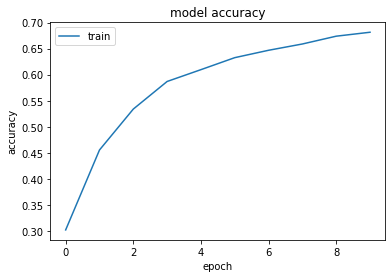

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

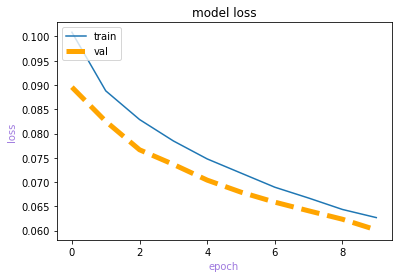

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color = "orange",linewidth = 5,linestyle = "--")
plt.title('model loss')
plt.ylabel('loss',color = "#9f7adf")
plt.xlabel('epoch',color = "#9f7adf")
plt.legend(['train', 'val'], loc='upper left')
plt.show()